<a href="https://colab.research.google.com/github/Isabela0929/2-Senales/blob/main/Parcial%20_3/Parcial_3_punto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Punto_2:

* Desacargamos la Canción de interes:

In [1]:
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.5/162.5 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.6/104.6 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 72.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.1/142.1 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 8.7 MB/s eta 0:00:00
  Created w

In [2]:
#simulación con canción de youtube
#instalar api youtube-dl
import os
import yt_dlp as youtube_dl
def download_ytvid_as_mp3(video_url,name):
    #video_url = input("enter url of youtube video:")
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

    print("Download complete... {}".format(filename))

In [3]:
#descargar canción de mi interés
link_= ["https://www.youtube.com/watch?v=tmB4En4ZBwg"]
name_ = ['Zion']
for name,link in zip(name_,link_):
    print(name)
    download_ytvid_as_mp3(link,name)

Zion
[youtube] Extracting URL: https://www.youtube.com/watch?v=tmB4En4ZBwg
[youtube] tmB4En4ZBwg: Downloading webpage
[youtube] tmB4En4ZBwg: Downloading ios player API JSON
[youtube] tmB4En4ZBwg: Downloading android player API JSON
[youtube] tmB4En4ZBwg: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=tmB4En4ZBwg
[youtube] tmB4En4ZBwg: Downloading webpage
[youtube] tmB4En4ZBwg: Downloading ios player API JSON
[youtube] tmB4En4ZBwg: Downloading android player API JSON
[youtube] tmB4En4ZBwg: Downloading m3u8 information
[info] tmB4En4ZBwg: Downloading 1 format(s): 251
[download] Destination: Zion.mp3
[download] 100% of    4.79MiB in 00:00:00 at 20.46MiB/s  
Download complete... Zion.mp3


* Convertir a mp3

In [4]:
import subprocess

for name in name_:
    subprocess.call(['ffmpeg','-y', '-i', name+'.mp3',
                   name+'.wav'])

In [5]:
!pip install soundfile #instalar sondfile

In [6]:
import soundfile as sf # para instalar pip install soundfile
from IPython.display import Audio #librería para reproducir audio
#lee archivos wav
for name in name_:
    nombre_out = "output.wav"
    x, fs = sf.read(name+'.wav')

    print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,name+'.wav'))

Frecuencia de muestreo 48000.00[Hz]
audio Zion.wav


In [7]:
xpro = x.copy() #copiar archivos para procesar
#leer 5 segundos de la canción
ti = 45 #tiempo incio a procesar seg
tf = 50 #tiempo final a procesar seg
m = xpro[int(ti*fs):int((tf*fs)),0] #señal mensaje en primer canal

In [8]:
#repoducir fragmento original #señal mensaje
Audio(m,rate=fs)

# Etapa 1:  **Mixer**

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

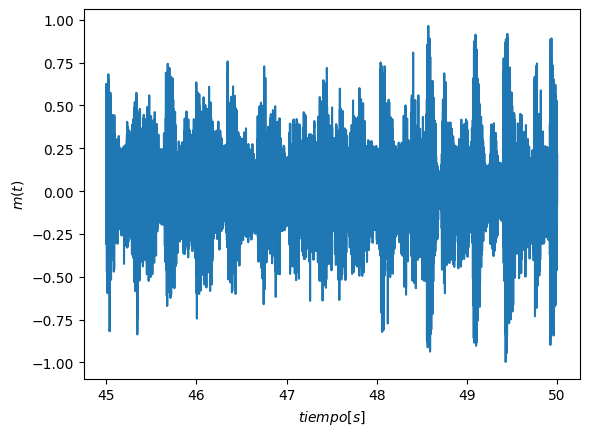

In [10]:
#Señal mensaje en tiempo y frecuencia
tt = np.arange(ti,tf,1/fs) # vector de tiempo
plt.plot(tt,m) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$m(t)$')
plt.show()

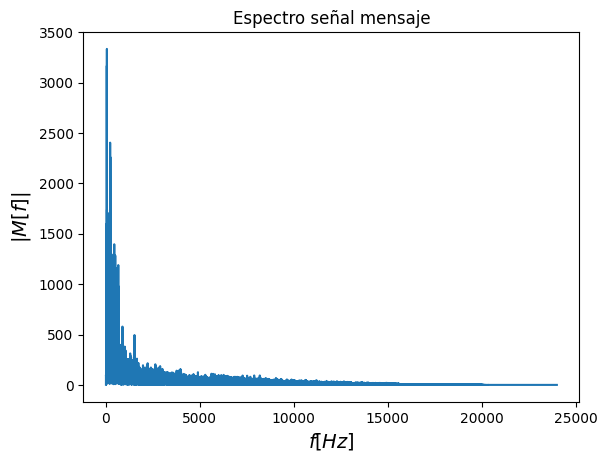

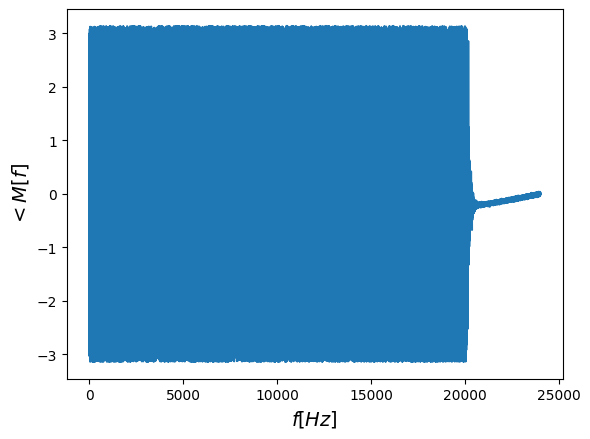

In [11]:
#Fourier señal mensaje
Mw = np.fft.rfft(m) # axis=0 permite aplicar fft por cada columna de xpro
vf = np.fft.rfftfreq(m.shape[0],1/fs) #se crea el vector de frecuencias
plt.plot(vf,abs(Mw))#se grafica la magnitud
plt.title(r'Espectro señal mensaje')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M[f]|$',fontsize = 14)
plt.show()

plt.plot(vf, np.angle(Mw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<M[f]$',fontsize = 14)
plt.show()

Se fija una $F_o >> F_{max},$ para nuestro caso:

$$\boxed{F_o = 12000 [Hz]}$$


In [12]:
Fo = 12000 #frecuencia portadora
c = np.cos(2*np.pi*Fo*tt) #portadora

In [13]:
#repoducir portadora
Audio(c,rate=fs)

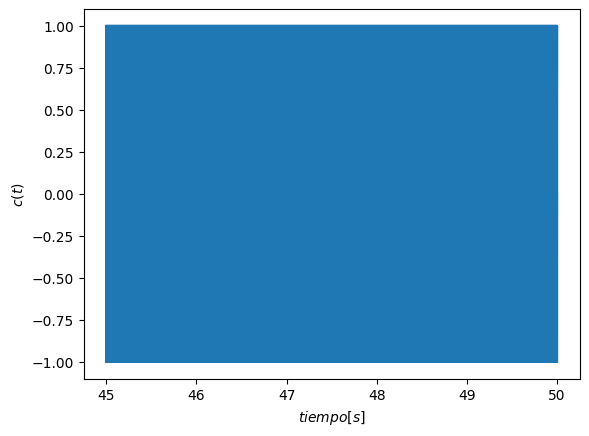

In [14]:
#Señal portadora en tiempo y frecuencia
plt.plot(tt,c) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$c(t)$')
plt.show()

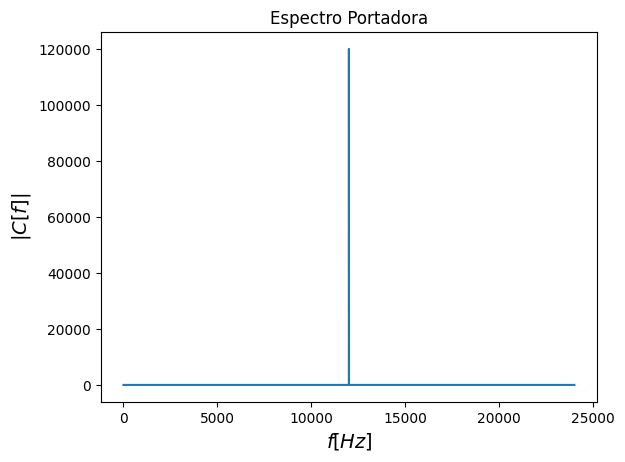

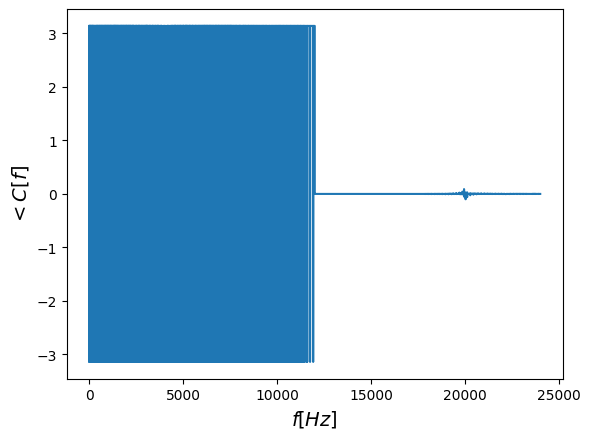

In [15]:
#Fourier señal portadora
Cw = np.fft.rfft(c) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Cw))#se grafica la magnitud
plt.title(r'Espectro Portadora')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|C[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Cw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<C[f]$',fontsize = 14)
plt.show()

In [16]:
#señal modulada
A1 = 2
y = A1*m*c #señal modulada en AM

In [17]:
#repoducir modulada
Audio(y,rate=fs)

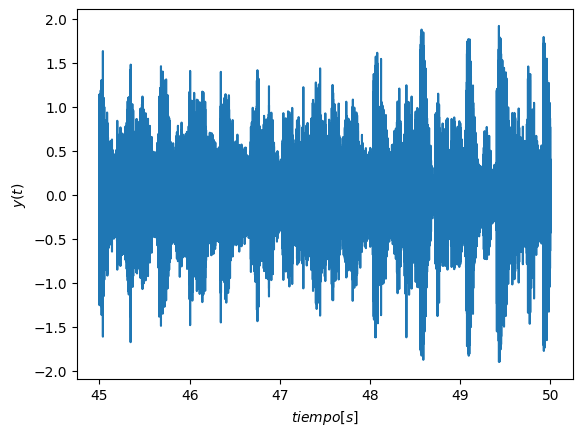

In [18]:
plt.plot(tt,y) #graficar señal modulada en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$y(t)$')
plt.show()

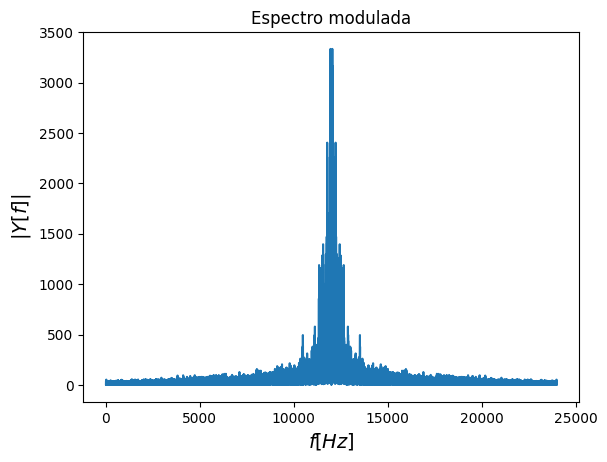

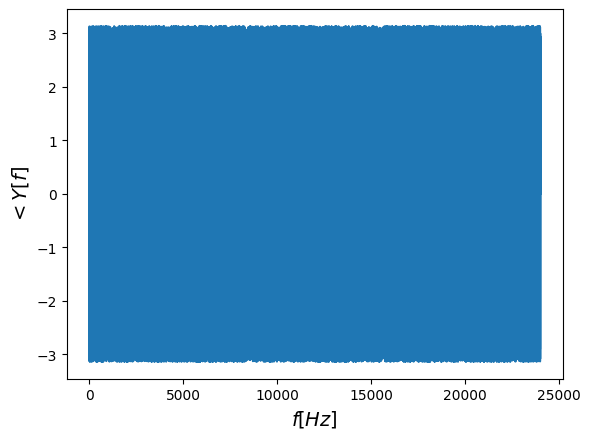

In [19]:
#Fourier señal modulada
Yw = np.fft.rfft(y) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Yw))#se grafica la magnitud
plt.title(r'Espectro modulada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|Y[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Yw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<Y[f]$',fontsize = 14)
plt.show()

## Demodulando la señal

In [20]:
d = y*c #señal demodulada
#repoducir señal demodulada
Audio(d,rate=fs)

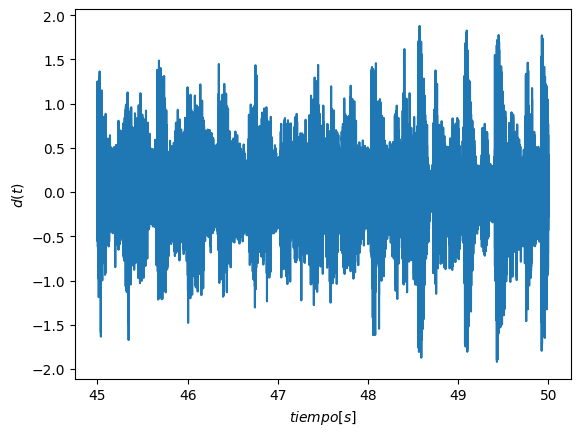

In [21]:
plt.plot(tt,d) #graficar señal demodulada en tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$d(t)$')
plt.show()

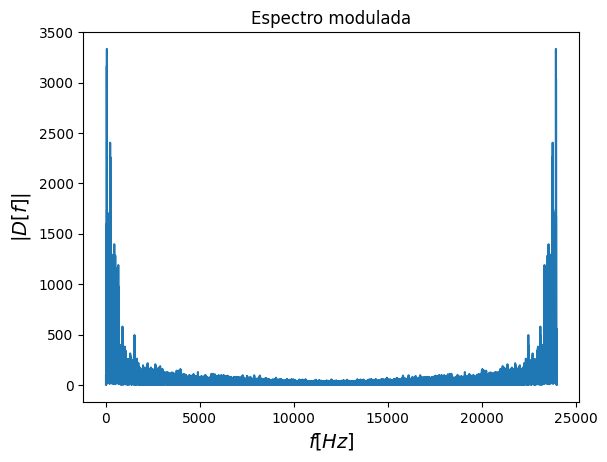

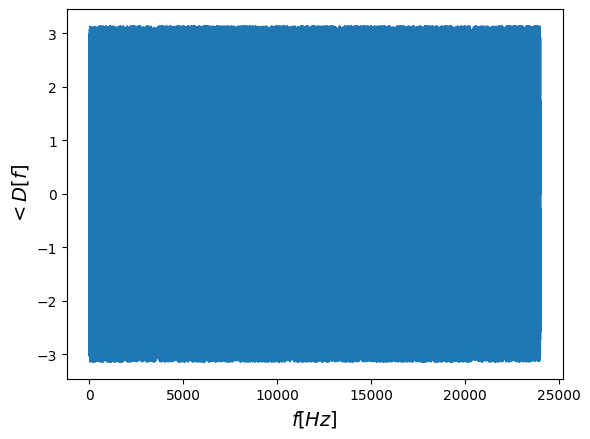

In [22]:
#Fourier señal demodulada
Dw = np.fft.rfft(d) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Dw))#se grafica la magnitud
plt.title(r'Espectro modulada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|D[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Dw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<D[f]$',fontsize = 14)
plt.show()

# Etapa 2: **Filtro pasabajas**

In [23]:
from scipy.signal import butter, cheby1, cheby2, bessel,filtfilt, lfilter, freqz_zpk, freqz
import matplotlib.pyplot as plt
import numpy as np

* Filtro butterwotrth

In [24]:
N = 10 #orden el filtro
Wn = 11900 #banda pasante
filt = 'lowpass' #tipo del filtro (pasa-baja, pasa-alta, pasabanda, rechazabanda)
out = 'zpk' #la funcion retorna los polos y ceros junto con la ganancia. Para usar numerador y denominador usar 'ba' junto con freqz
zeros, poles, gain = butter(N, Wn, btype=filt, output=out, fs=fs)
w, h = freqz_zpk(zeros, poles, gain, fs=fs) #Para indicar la longitud usar worN=K

In [25]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Circle

def plot_freq_response(filter_name, w, h, N): #Mostrar la respuesta en frecuencia del filtro
  fig = plt.figure()
  ax1 = fig.add_subplot(1, 1, 1)
  ax1.set_title(filter_name +' Digital filter frequency response, order= ' + str(N))
  ax1.plot(w, 20 * np.log10(abs(h)), 'b')
  ax1.set_ylabel('Amplitude [dB]', color='b')
  ax1.set_xlabel('Frequency [Hz]')
  ax1.grid()
  ax2 = ax1.twinx()
  angles = np.unwrap(np.angle(h))
  ax2.plot(w, angles, 'g')
  ax2.set_ylabel('Angle [radians]', color='g')
  plt.axis('tight')
  plt.show()

In [26]:
def show_zp(z, p, title= 'Z-plane'): # Mostrar la ubicación de los polos y los zeros
  ax = plt.gca()

  ax.plot(np.real(z), np.imag(z), 'bo', fillstyle='none', ms = 10)
  ax.plot(np.real(p), np.imag(p), 'rx', fillstyle='none', ms = 10)
  unit_circle = Circle((0,0), radius=1, fill=False,
                        color='black', ls='solid', alpha=0.9)
  ax.add_patch(unit_circle)
  ax.axvline(0, color='0.7')
  ax.axhline(0, color='0.7')

  plt.title(title)
  plt.xlabel(r'Re{$z$}')
  plt.ylabel(r'Im{$z$}')
  plt.axis('equal')
  plt.xlim((-2, 2))
  plt.ylim((-2, 2))
  plt.grid()

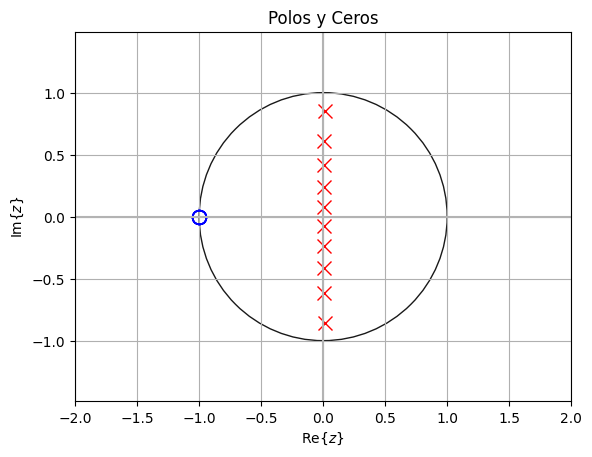

In [27]:
show_zp(zeros, poles, title='Polos y Ceros')

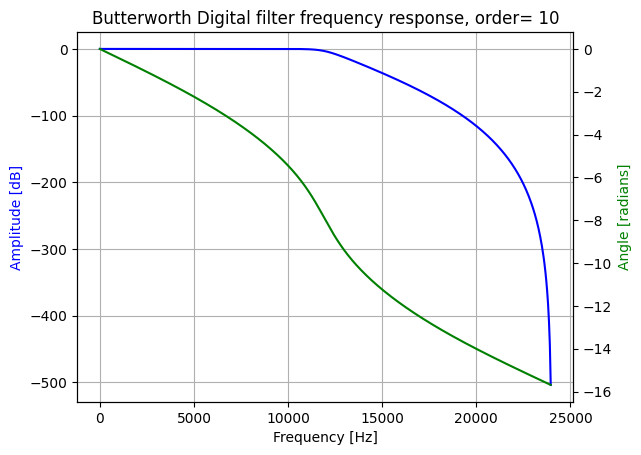

In [28]:
plot_freq_response('Butterworth', w, h, N) #gráfica de butterworth

In [29]:
out='ba'
num, den = butter(N, Wn, btype=filt, output=out, fs=fs)
xf = lfilter(num, den, d, axis=0)
me = (2/A1)*xf #señal reescalada
Audio(me,rate=fs) #Audio con ruido filtrado

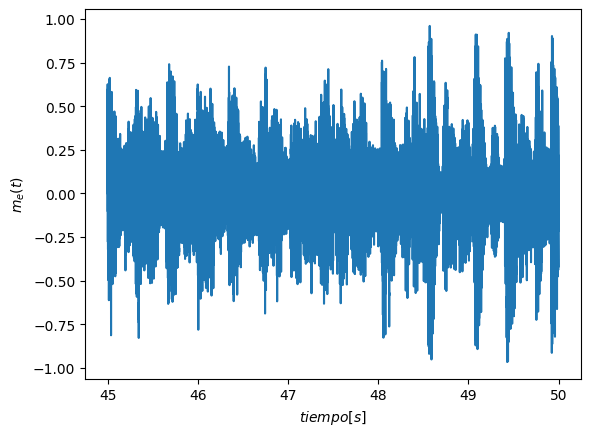

In [30]:
plt.plot(tt,me) #graficar señal recuperada
plt.xlabel('$tiempo [s]$')
plt.ylabel('$m_e(t)$')
plt.show()

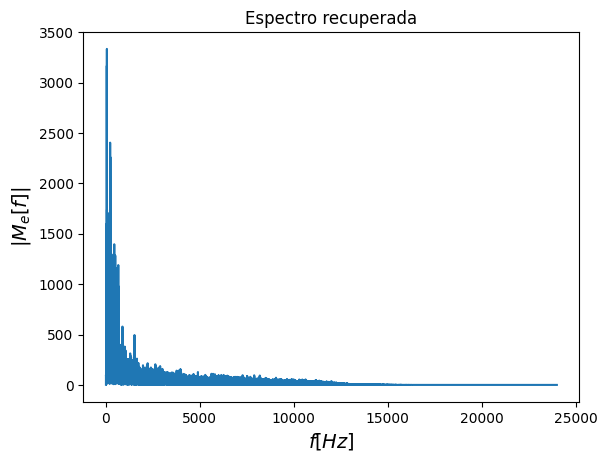

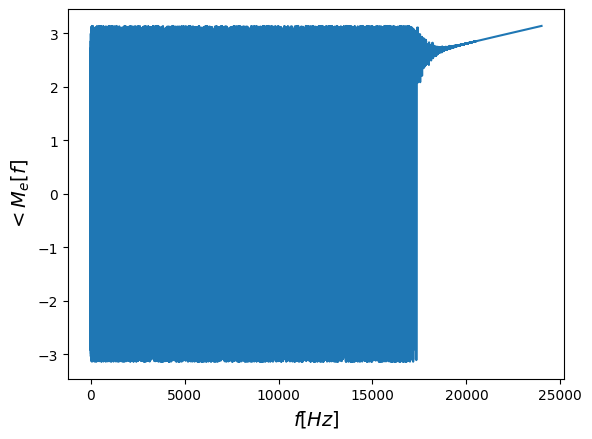

In [31]:
#Fourier señal recuperada
Mew = np.fft.rfft(me) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Mew))#se grafica la magnitud
plt.title(r'Espectro recuperada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M_e[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Mew))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<M_e[f]$',fontsize = 14)
plt.show()

* Filtro Bessel

In [32]:
out = 'ba'
normalization = 'mag' #Ajusta la frecuencia crítica según la respuesta que se desea
num, den = bessel(N, Wn=Wn, btype=filt, norm=normalization, output=out, fs=fs) #regresa numerador y denominador. Si se quiere obtener los polos y ceros usar scipy.signal.tf2zpk
w, h = freqz(num, den, fs=fs)

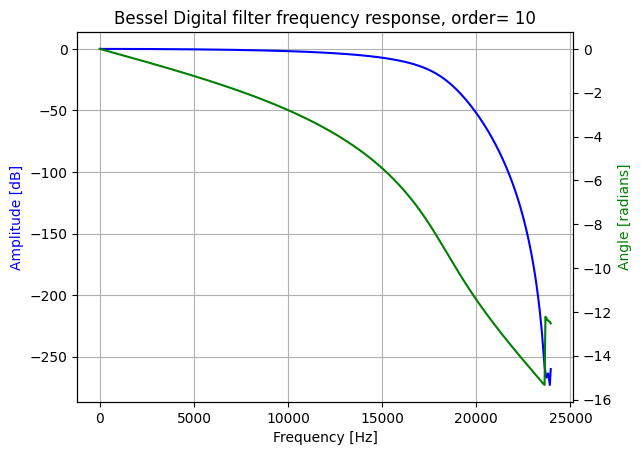

In [33]:
plot_freq_response('Bessel', w, h, N)

In [34]:
xf = lfilter(num, den, d, axis=0)
me = (2/A1)*xf #señal reescalada
Audio(me,rate=fs) #Audio con ruido filtrado

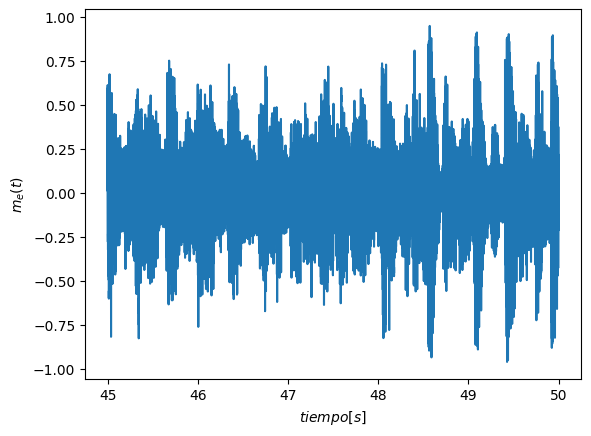

In [35]:
plt.plot(tt,me) #graficar señal recuperada
plt.xlabel('$tiempo [s]$')
plt.ylabel('$m_e(t)$')
plt.show()

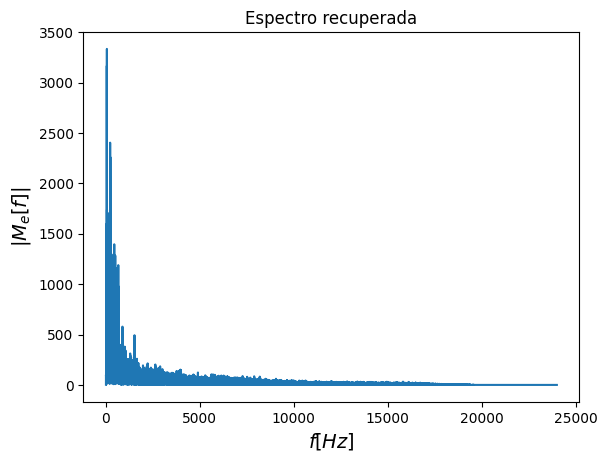

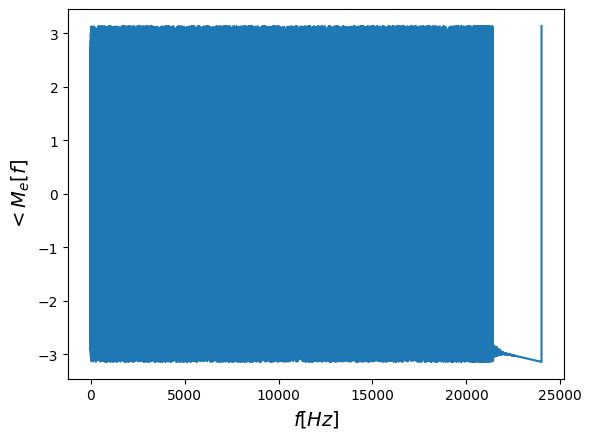

In [36]:
#Fourier señal recuperada
Mew = np.fft.rfft(me) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Mew))#se grafica la magnitud
plt.title(r'Espectro recuperada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M_e[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Mew))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<M_e[f]$',fontsize = 14)
plt.show()

* Filtro Chebyshev1

In [37]:
N = 4
ripple = 10
out = 'zpk'
zeros, poles, gain = cheby1(N, rp=ripple, Wn=Wn, btype=filt, output=out, fs=fs)
w, h = freqz_zpk(zeros, poles, gain, fs=fs)

b, a = cheby1(N, rp=ripple, Wn=Wn, btype=filt, fs=fs)

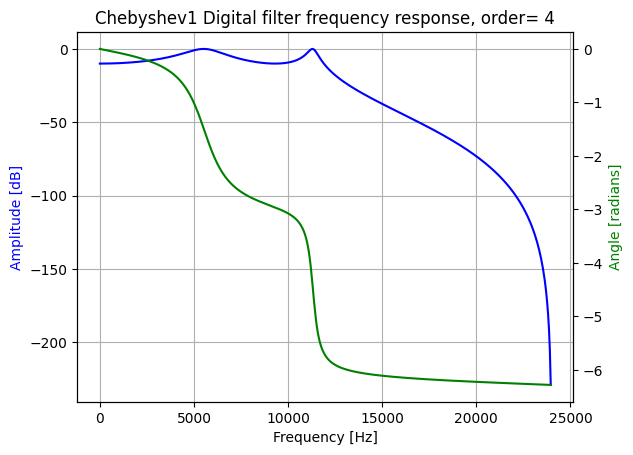

In [38]:
plot_freq_response('Chebyshev1', w, h, N)

In [39]:
xf = lfilter(b, a, d, axis=0)
me = (2/A1)*xf #señal reescalada
Audio(me,rate=fs) #Audio con ruido filtrado

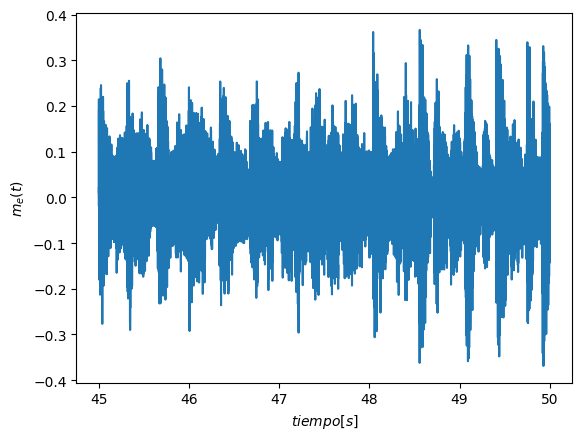

In [40]:
plt.plot(tt,me) #graficar señal recuperada
plt.xlabel('$tiempo [s]$')
plt.ylabel('$m_e(t)$')
plt.show()

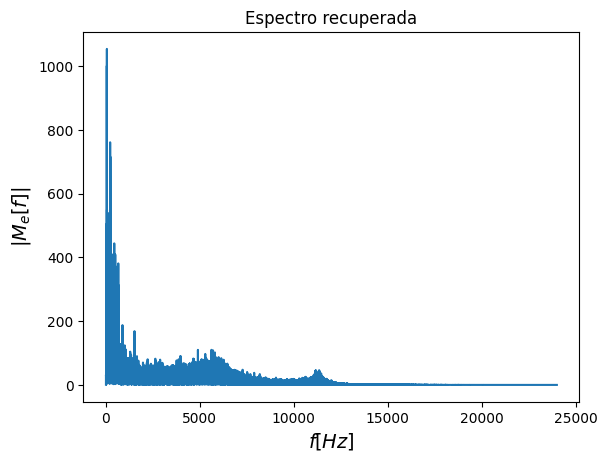

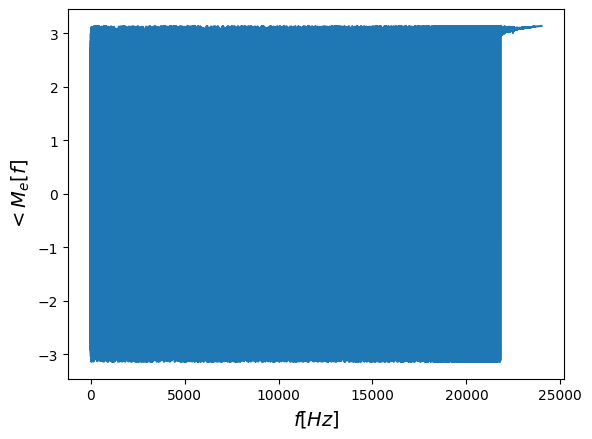

In [41]:
#Fourier señal recuperada
Mew = np.fft.rfft(me) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Mew))#se grafica la magnitud
plt.title(r'Espectro recuperada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M_e[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Mew))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<M_e[f]$',fontsize = 14)
plt.show()

* Filtro Chebyshev2

In [42]:
N = 4
ripple = 20
out = 'ba' #no regresa los polos y ceros, sino la funcion de transferencia
num, den = cheby2(N, rs=ripple, Wn=Wn, btype=filt, output=out, fs=fs) #regresa numerador y denominador. Si se quiere obtener los polos y ceros usar scipy.signal.tf2zpk
w, h = freqz(num, den, fs=fs)

b, a = cheby2(N, rs=ripple, Wn=Wn, btype=filt, fs=fs)

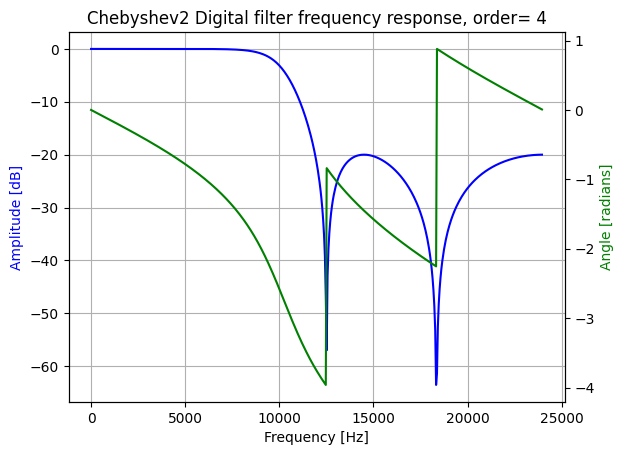

In [43]:
plot_freq_response('Chebyshev2', w, h, N)

In [44]:
xf = lfilter(b, a, d, axis=0)
me = (2/A1)*xf #señal reescalada
Audio(me,rate=fs) #Audio con ruido filtrado

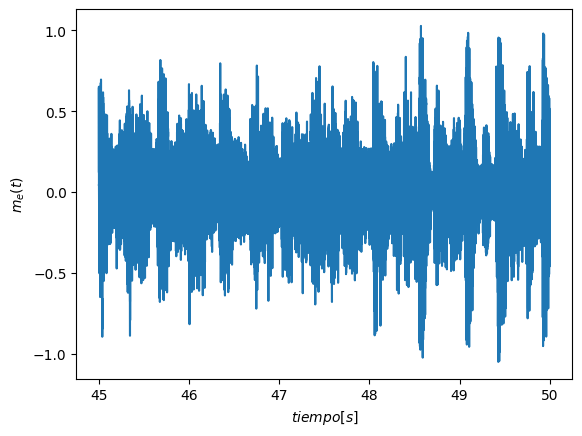

In [45]:
plt.plot(tt,me) #graficar señal recuperada
plt.xlabel('$tiempo [s]$')
plt.ylabel('$m_e(t)$')
plt.show()

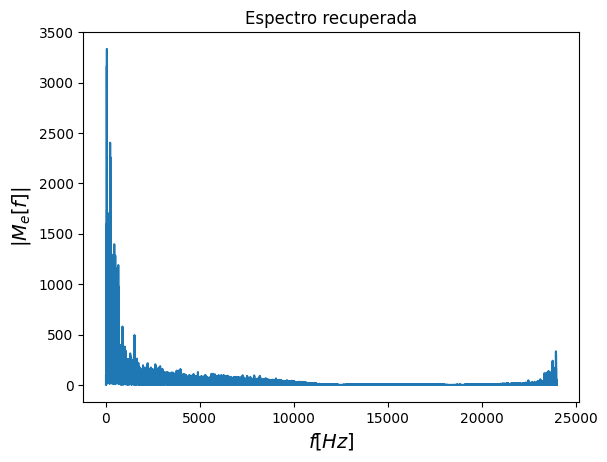

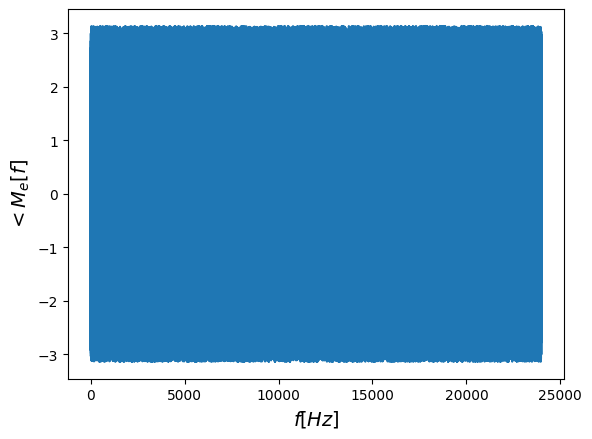

In [46]:
#Fourier señal recuperada
Mew = np.fft.rfft(me) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Mew))#se grafica la magnitud
plt.title(r'Espectro recuperada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M_e[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Mew))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<M_e[f]$',fontsize = 14)
plt.show()